In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import ast




In [2]:
games=pd.read_csv("games.csv")

In [3]:
games

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [4]:
games.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [5]:
games.drop(["Unnamed: 0"],inplace=True,axis=1)

In [6]:
games.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [7]:
def proper(x):
    if isinstance(x,str):
        x=x.strip()
        if(x.endswith("K")):
            return int(float(x[:-1])*1000)
        return int(float(x[::-1]))
    return x

In [8]:
games["Times Listed"]=games["Times Listed"].apply(proper).astype(int)

In [9]:
games["Number of Reviews"]=games["Number of Reviews"].apply(proper).astype(int)

In [10]:
games["Plays"]=games["Plays"].apply(proper).astype(int)

In [11]:
games["Playing"]=games["Playing"].apply(proper).astype(int)

In [12]:
games["Backlogs"]=games["Backlogs"].apply(proper).astype(int)

In [13]:
games["Wishlist"]=games["Wishlist"].apply(proper).astype(int)

In [14]:
games["Release Date"]=pd.to_datetime(games["Release Date"],errors='coerce')

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              1512 non-null   object        
 1   Release Date       1509 non-null   datetime64[ns]
 2   Team               1511 non-null   object        
 3   Rating             1499 non-null   float64       
 4   Times Listed       1512 non-null   int32         
 5   Number of Reviews  1512 non-null   int32         
 6   Genres             1512 non-null   object        
 7   Summary            1511 non-null   object        
 8   Reviews            1512 non-null   object        
 9   Plays              1512 non-null   int32         
 10  Playing            1512 non-null   int32         
 11  Backlogs           1512 non-null   int32         
 12  Wishlist           1512 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(6), object(5)
memory us

In [16]:
games["Rating"]=games["Rating"].fillna(games["Rating"].mean())

In [17]:
games["Release Date"]=games["Release Date"].fillna(games["Release Date"].mean())

In [18]:
games.isna().sum()

Title                0
Release Date         0
Team                 1
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              1
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

In [19]:
games["Team"]=games["Team"].fillna(games["Team"].mode()[0])


In [20]:
games["Summary"]=games["Summary"].fillna(games["Summary"].mode()[0])

In [21]:
games.isna().sum()

Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

In [22]:
games.duplicated().sum()

382

In [23]:
games=games.drop_duplicates()

In [24]:
games

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,976,4900,1800
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3000,3000,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8300,2300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,2010-12-22,['Telltale Games'],3.2,49,49,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,367,5,322,76
1508,Team Sonic Racing,2019-05-21,"['Sumo Digital', 'Sega']",2.9,462,462,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1500,94,314,701
1509,Dragon's Dogma,2012-05-22,['Capcom'],3.7,12,12,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1100,54,784,602
1510,Baldur's Gate 3,2020-10-06,['Larian Studios'],4.1,561,561,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,962,97,883,206


In [25]:
games["Genres"]

0                                    ['Adventure', 'RPG']
1                ['Adventure', 'Brawler', 'Indie', 'RPG']
2                                    ['Adventure', 'RPG']
3       ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...
4                      ['Adventure', 'Indie', 'Platform']
                              ...                        
1507                     ['Adventure', 'Point-and-Click']
1508                                 ['Arcade', 'Racing']
1509                                   ['Brawler', 'RPG']
1510    ['Adventure', 'RPG', 'Strategy', 'Tactical', '...
1511                              ['Adventure', 'Puzzle']
Name: Genres, Length: 1130, dtype: object

In [26]:
games["Genres"] = games["Genres"].str.replace(r"[\[\]']", "", regex=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_2188\969712363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["Genres"] = games["Genres"].str.replace(r"[\[\]']", "", regex=True)


In [27]:
games["Genres"]

0                                          Adventure, RPG
1                          Adventure, Brawler, Indie, RPG
2                                          Adventure, RPG
3              Adventure, Indie, RPG, Turn Based Strategy
4                              Adventure, Indie, Platform
                              ...                        
1507                           Adventure, Point-and-Click
1508                                       Arcade, Racing
1509                                         Brawler, RPG
1510    Adventure, RPG, Strategy, Tactical, Turn Based...
1511                                    Adventure, Puzzle
Name: Genres, Length: 1130, dtype: object

In [28]:
games["Reviews"] = games["Reviews"].str.replace(r"[\[\]']", "", regex=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_2188\1290334063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["Reviews"] = games["Reviews"].str.replace(r"[\[\]']", "", regex=True)


In [29]:
games["Reviews"]

0       "The first playthrough of elden ring is one of...
1       convinced this is a roguelike for people who d...
2       This game is the game (that is not CS:GO) that...
3       soundtrack is tied for #1 with nier automata. ...
4       "this games worldbuilding is incredible, with ...
                              ...                        
1507    Very enjoyable game. The story adds onto the m...
1508    jogo morto mas bom, not my cup of tea, "Compar...
1509    Underrated., A grandes rasgos, es como un MMO ...
1510    Bu türe bu oyunla girmeye çalışmak hataydı san...
1511    Legal, Pretty Average Lego Game But It Was My ...
Name: Reviews, Length: 1130, dtype: object

In [30]:
games["Team"] = games["Team"].str.replace(r"[\[\]']", "", regex=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_2188\2335143456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["Team"] = games["Team"].str.replace(r"[\[\]']", "", regex=True)


In [31]:
games["Team"]

0            Bandai Namco Entertainment, FromSoftware
1                                    Supergiant Games
2       Nintendo, Nintendo EPD Production Group No. 3
3                                        tobyfox, 8-4
4                                         Team Cherry
                            ...                      
1507                                   Telltale Games
1508                               Sumo Digital, Sega
1509                                           Capcom
1510                                   Larian Studios
1511                              WB Games, TT Fusion
Name: Team, Length: 1130, dtype: object

In [32]:
games

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"Bandai Namco Entertainment, FromSoftware",4.5,3900,3900,"Adventure, RPG","Elden Ring is a fantasy, action and open world...","""The first playthrough of elden ring is one of...",17000,3800,4600,4800
1,Hades,2019-12-10,Supergiant Games,4.3,2900,2900,"Adventure, Brawler, Indie, RPG",A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21000,3200,6300,3600
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"Nintendo, Nintendo EPD Production Group No. 3",4.4,4300,4300,"Adventure, RPG",The Legend of Zelda: Breath of the Wild is the...,This game is the game (that is not CS:GO) that...,30000,2500,5000,2600
3,Undertale,2015-09-15,"tobyfox, 8-4",4.2,3500,3500,"Adventure, Indie, RPG, Turn Based Strategy","A small child falls into the Underground, wher...",soundtrack is tied for #1 with nier automata. ...,28000,976,4900,1800
4,Hollow Knight,2017-02-24,Team Cherry,4.4,3000,3000,"Adventure, Indie, Platform",A 2D metroidvania with an emphasis on close co...,"""this games worldbuilding is incredible, with ...",21000,2400,8300,2300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,2010-12-22,Telltale Games,3.2,49,49,"Adventure, Point-and-Click",Back to the Future: The Game is one of Telltal...,Very enjoyable game. The story adds onto the m...,367,5,322,76
1508,Team Sonic Racing,2019-05-21,"Sumo Digital, Sega",2.9,462,462,"Arcade, Racing",Team Sonic Racing combines the best elements o...,"jogo morto mas bom, not my cup of tea, ""Compar...",1500,94,314,701
1509,Dragon's Dogma,2012-05-22,Capcom,3.7,12,12,"Brawler, RPG","Set in a huge open world, Dragon’s Dogma: Dark...","Underrated., A grandes rasgos, es como un MMO ...",1100,54,784,602
1510,Baldur's Gate 3,2020-10-06,Larian Studios,4.1,561,561,"Adventure, RPG, Strategy, Tactical, Turn Based...","An ancient evil has returned to Baldur's Gate,...",Bu türe bu oyunla girmeye çalışmak hataydı san...,962,97,883,206


In [33]:
games.to_csv("games.csv",index=False)

In [33]:
top=30
top_games=games.sort_values("Rating",ascending=False).head(top)


In [34]:
top_games

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1252,Elden Ring: Shadow of the Erdtree,2012-09-16 19:03:13.240556800,"FromSoftware, Bandai Namco Entertainment",4.8,81,81,"Adventure, RPG",An expansion to Elden Ring setting players on ...,I really loved that they integrated Family Guy...,1,0,93,641
1090,The Great Ace Attorney 2: Resolve,2017-08-03 00:00:00.000000000,Capcom,4.6,683,683,"Adventure, Point-and-Click, Puzzle, Visual Novel",The Great Ace Attorney 2: Resolve is the eleve...,"""Greatest of all time. Zenith of the medium. H...",1100,57,177,864
1198,Metal Gear Solid 3: Snake Eater HD Edition,2011-11-08 00:00:00.000000000,Konami Digital Entertainment,4.6,392,392,"Adventure, Shooter","Get Metal Gear Solid 3: Snake Eater HD, Shoote...",Após um pequeno grande sufoco pra emular o jog...,2500,43,455,442
43,Outer Wilds,2019-05-28 00:00:00.000000000,"Mobius Digital, Annapurna Interactive",4.6,1800,1800,"Adventure, Indie, Puzzle, Simulator",Outer Wilds is a critically-acclaimed and awar...,"Replayed with my girlfriend, still the best ga...",7700,166,4800,3100
139,Disco Elysium,2019-10-15 00:00:00.000000000,ZA/UM,4.6,1100,1100,"Adventure, RPG, Turn Based Strategy","A CRPG in which, waking up in a hotel room a t...","""I really enjoyed this one. The story is super...",4000,874,2800,1900
1153,Dwarf Fortress,2022-12-06 00:00:00.000000000,"Bay 12 Games, Kitfox Games",4.6,84,84,"Indie, RPG, Simulator, Strategy",In this complex construction/management/roguel...,"Both a fascinating, awe-inspiring technical ac...",522,8,181,591
1286,Tokyo Necro,2016-01-29 00:00:00.000000000,"Nitroplus, JAST USA",4.6,12,12,"Adventure, Visual Novel",Nemo ante mortem beatus.\n \n ...,the indifferent cruelty of the universe when t...,41,22,5,96
1138,Half-Life: Alyx,2020-03-23 00:00:00.000000000,Valve,4.6,515,515,"Adventure, Puzzle, Shooter",Half-Life: Alyx is Valve’s VR return to the Ha...,"""Its like I was actually there. What other tr...",1900,12,1200,1400
297,Bloodborne: The Old Hunters,2015-11-24 00:00:00.000000000,"FromSoftware, Sony Computer Entertainment",4.6,662,662,"Adventure, RPG",The Old Hunters is the first Expansion for Blo...,HAHA FINALMENTE MATEI O LAWRENCE E O ÓRFÃO DE ...,4400,86,39,616
1104,Sekiro: Shadows Die Twice - GOTY Edition,2020-10-28 00:00:00.000000000,"Activision, FromSoftware",4.6,371,371,"Adventure, Brawler, RPG",Carve your own clever path to vengeance in the...,Simplesmente uma perfeição. Estou completament...,1400,351,164,373


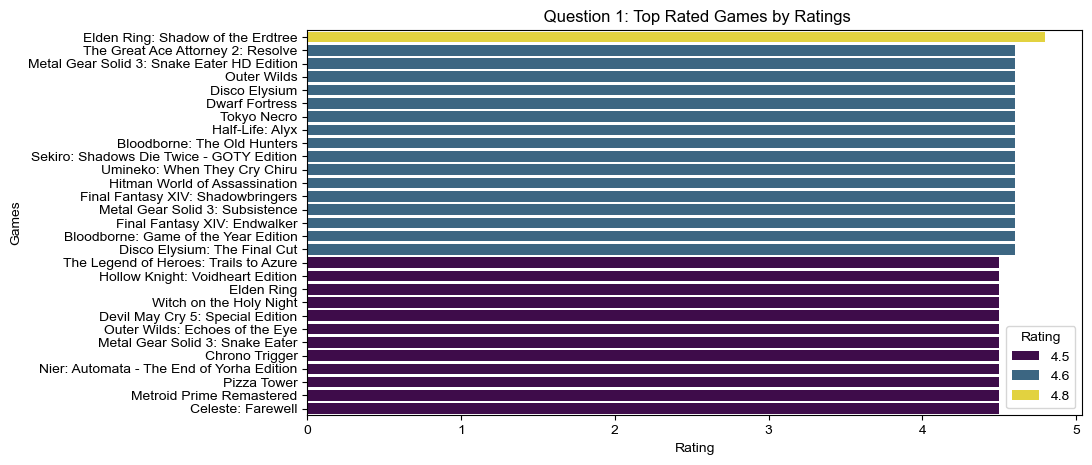

In [35]:
#Question 1


plt.figure(figsize=(10,5))
sns.barplot(data=top_games,x="Rating",y="Title",palette='viridis',hue="Rating")

plt.xlabel("Rating")
plt.ylabel("Games")
plt.title(" Question 1: Top Rated Games by Ratings")
sns.set_theme(style="darkgrid")


plt.show()

In [36]:
#Question 2
top=30
avg_ratings=games.groupby("Team")["Rating"].mean().sort_values(ascending=False).head(top).reset_index()

In [37]:
avg_ratings

,Team,Rating
0,Valve,4.60
1,"Sony Computer Entertainment, FromSoftware",4.60
2,07th Expansion,4.60
3,ZA/UM,4.60
4,"Activision, FromSoftware",4.60
5,"Bay 12 Games, Kitfox Games",4.60
6,Konami Digital Entertainment,4.60
7,"Inlusio Interactive, IO Interactive",4.60
8,"FromSoftware, Sony Computer Entertainment",4.55
9,"Mobius Digital, Annapurna Interactive",4.55


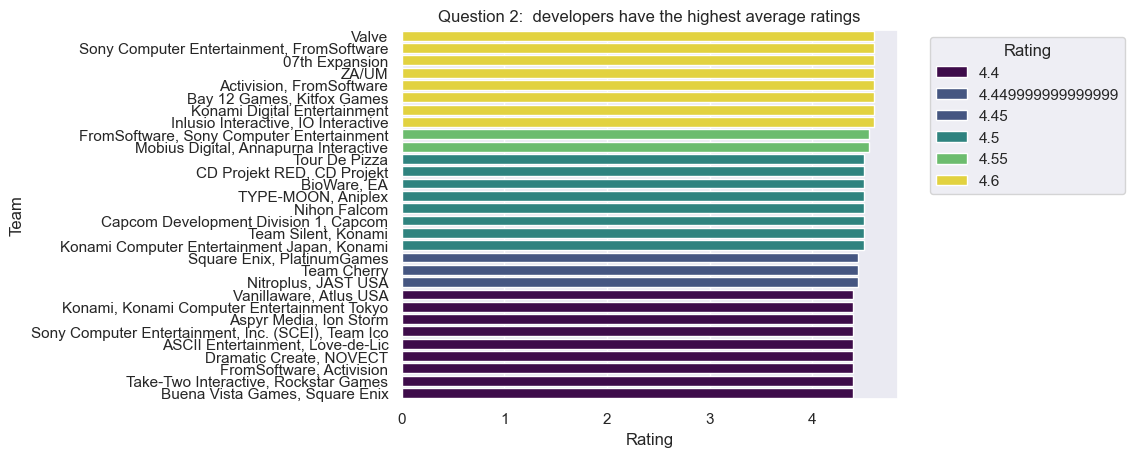

In [39]:

sns.barplot(data=avg_ratings,x="Rating",y="Team",palette='viridis',hue="Rating")
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Question 2:  developers have the highest average ratings")
plt.show()

In [40]:
#Question 3
common_generes=games["Genres"].value_counts().reset_index().sort_values("count",ascending=False).head(10)

In [41]:
common_generes

,Genres,count
0,"Adventure, RPG",99
1,"Adventure, Platform",73
2,"Adventure, Shooter",60
3,Shooter,53
4,Adventure,37
5,RPG,33
6,"Adventure, RPG, Turn Based Strategy",29
7,Fighting,27
8,Platform,25
9,"Adventure, Brawler",24


Text(0.5, 0, 'Count of Each Genre')

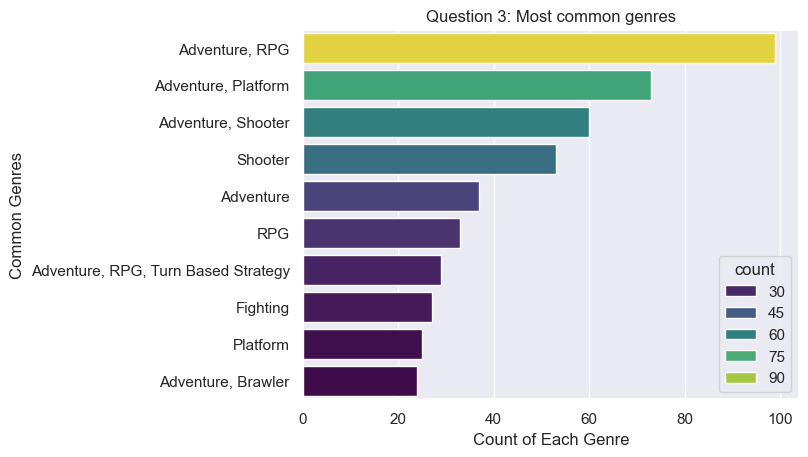

In [43]:
sns.barplot(data=common_generes,x="count",y="Genres",palette='viridis',hue="count")
plt.ylabel("Common Genres")
plt.title("Question 3: Most common genres")
plt.xlabel("Count of Each Genre")

In [81]:
# Create a new column for backlog-to-wishlist ratio
games["Backlog_to_Wishlist"] = games["Backlogs"] / (games["Wishlist"] + 1)  # +1 to avoid division by zero

# Sort to find games with highest ratio
backlog_games = games.sort_values("Backlog_to_Wishlist", ascending=False)[
    ["Title", "Team", "Backlogs", "Wishlist", "Backlog_to_Wishlist"]
].head(10)

print(backlog_games)

                                         Title  \
1321                 Call of Duty: Black Ops 4   
1120             God of War: Chains of Olympus   
1055                                Black Mesa   
172                      Metroid: Zero Mission   
1362  Marvel vs. Capcom: Clash of Super Heroes   
690                                   Pikmin 2   
684                          Final Fantasy VII   
978     The Legend of Zelda: The Wind Waker HD   
1342                    Mount & Blade: Warband   
1048                     Saints Row: The Third   

                                                   Team  Backlogs  Wishlist  \
1321                               Treyarch, Activision       972         1   
1120  Sony Computer Entertainment, Inc. (SCEI), Read...       995         3   
1055                                 Crowbar Collective      1500         6   
172                             Nintendo R&D1, Nintendo      1500         7   
1362  Virgin Interactive Entertainment (Europe) Ltd...

C:\Users\Dell\AppData\Local\Temp\ipykernel_7008\3790226530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["Backlog_to_Wishlist"] = games["Backlogs"] / (games["Wishlist"] + 1)  # +1 to avoid division by zero


C:\Users\Dell\AppData\Local\Temp\ipykernel_7008\1945658047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=backlog_games, x="Backlog_to_Wishlist", y="Title", palette="mako")


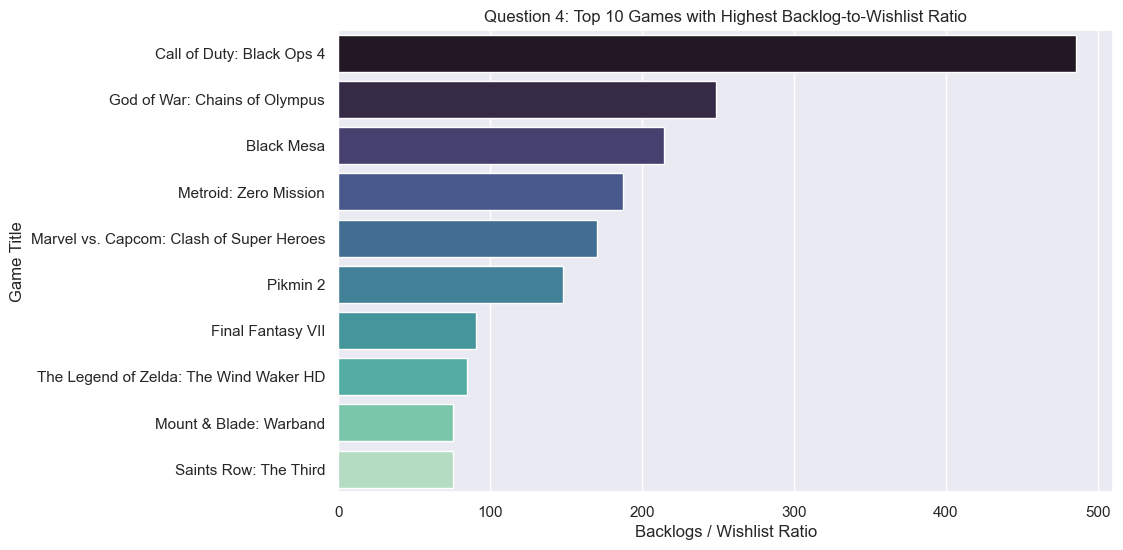

In [85]:
plt.figure(figsize=(10,6))
sns.barplot(data=backlog_games, x="Backlog_to_Wishlist", y="Title", palette="mako")

plt.title("Question 4: Top 10 Games with Highest Backlog-to-Wishlist Ratio")
plt.xlabel("Backlogs / Wishlist Ratio")
plt.ylabel("Game Title")
plt.show()

In [93]:
games["Year"]=games["Release Date"].dt.year

C:\Users\Dell\AppData\Local\Temp\ipykernel_7008\768196694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["Year"]=games["Release Date"].dt.year


In [94]:
releases_per_year = games.groupby("Year")["Title"].count().reset_index()
releases_per_year.columns = ["Release Date", "Count"]

In [95]:
releases_per_year

,Release Date,Count
0,1980,1
1,1982,1
2,1985,1
3,1986,3
4,1987,3
5,1988,3
6,1989,3
7,1990,6
8,1991,8
9,1992,6


Text(0.5, 1.0, 'Question 5: game release trend across years')

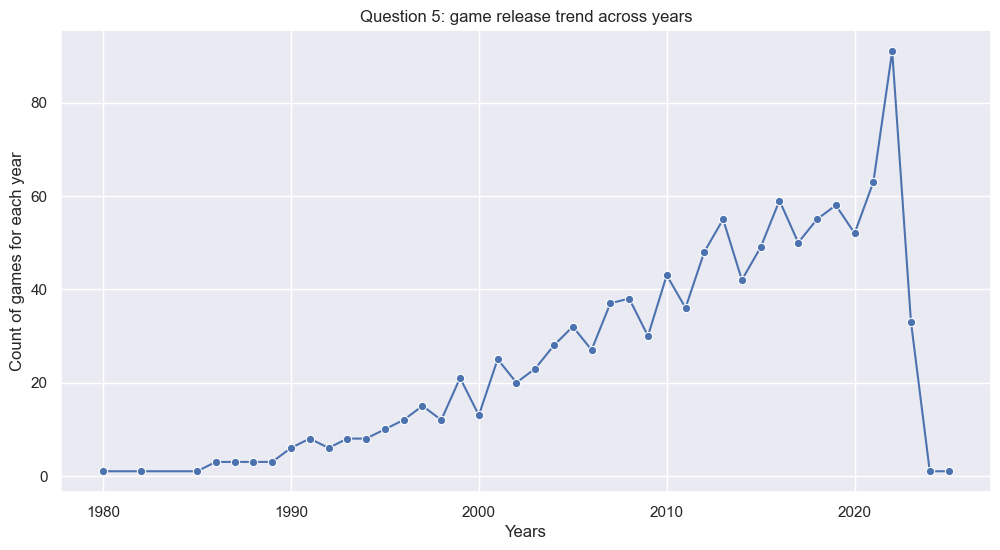

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=releases_per_year,x="Release Date",y="Count",marker='o')
plt.xlabel("Years")
plt.ylabel("Count of games for each year")
plt.title("Question 5: game release trend across years")

In [44]:
#Which games have the highest backlog compared to wishlist?
games

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"Bandai Namco Entertainment, FromSoftware",4.5,3900,3900,"Adventure, RPG","Elden Ring is a fantasy, action and open world...","""The first playthrough of elden ring is one of...",17000,3800,4600,4800
1,Hades,2019-12-10,Supergiant Games,4.3,2900,2900,"Adventure, Brawler, Indie, RPG",A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21000,3200,6300,3600
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"Nintendo, Nintendo EPD Production Group No. 3",4.4,4300,4300,"Adventure, RPG",The Legend of Zelda: Breath of the Wild is the...,This game is the game (that is not CS:GO) that...,30000,2500,5000,2600
3,Undertale,2015-09-15,"tobyfox, 8-4",4.2,3500,3500,"Adventure, Indie, RPG, Turn Based Strategy","A small child falls into the Underground, wher...",soundtrack is tied for #1 with nier automata. ...,28000,976,4900,1800
4,Hollow Knight,2017-02-24,Team Cherry,4.4,3000,3000,"Adventure, Indie, Platform",A 2D metroidvania with an emphasis on close co...,"""this games worldbuilding is incredible, with ...",21000,2400,8300,2300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,2010-12-22,Telltale Games,3.2,49,49,"Adventure, Point-and-Click",Back to the Future: The Game is one of Telltal...,Very enjoyable game. The story adds onto the m...,367,5,322,76
1508,Team Sonic Racing,2019-05-21,"Sumo Digital, Sega",2.9,462,462,"Arcade, Racing",Team Sonic Racing combines the best elements o...,"jogo morto mas bom, not my cup of tea, ""Compar...",1500,94,314,701
1509,Dragon's Dogma,2012-05-22,Capcom,3.7,12,12,"Brawler, RPG","Set in a huge open world, Dragon’s Dogma: Dark...","Underrated., A grandes rasgos, es como un MMO ...",1100,54,784,602
1510,Baldur's Gate 3,2020-10-06,Larian Studios,4.1,561,561,"Adventure, RPG, Strategy, Tactical, Turn Based...","An ancient evil has returned to Baldur's Gate,...",Bu türe bu oyunla girmeye çalışmak hataydı san...,962,97,883,206


Text(0.5, 1.0, 'Question 6: DIstribution of user ratings')

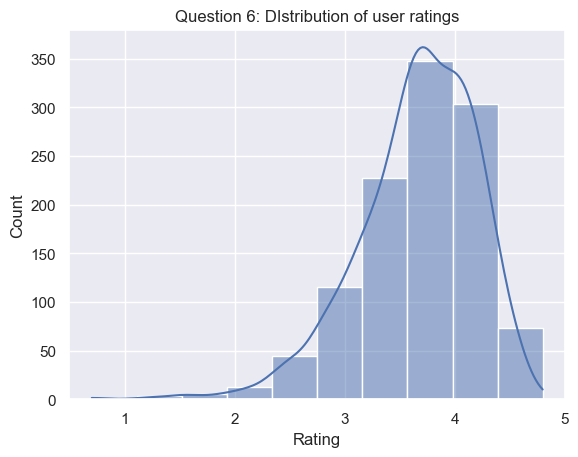

In [45]:
# question 6
sns.histplot(games["Rating"],bins=10,kde=True)
plt.xlabel("Rating")
plt.title("Question 6: DIstribution of user ratings")

In [47]:
# question 7
top_wishlist=games.sort_values("Wishlist",ascending=False).head(30).reset_index()

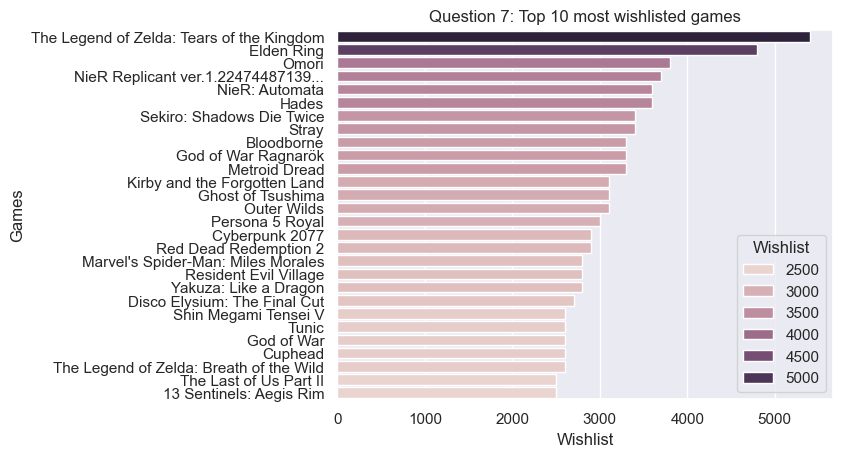

In [49]:
sns.barplot(data=top_wishlist,x='Wishlist',y="Title",hue="Wishlist")
plt.title("Question 7: Top 10 most wishlisted games")
plt.ylabel("Games")
plt.show()

In [51]:
avg_play=games.groupby("Genres")["Plays"].mean().sort_values(ascending=False).reset_index().head(10)

In [52]:
avg_play

,Genres,Plays
0,"Adventure, Indie, Platform, RPG, Strategy",18000.000000
1,"Arcade, Indie, Platform, Shooter",18000.000000
2,"Indie, Racing, Sport",17000.000000
3,"Indie, Platform, Sport",16000.000000
4,"Adventure, Platform, Puzzle, Shooter",15566.666667
5,"Platform, Puzzle, Shooter",15500.000000
6,"Puzzle, Real Time Strategy, Simulator, Strateg...",14000.000000
7,"Adventure, Brawler, Shooter, Strategy",14000.000000
8,"Fighting, Platform",13480.000000
9,"MOBA, RPG, Strategy",13000.000000


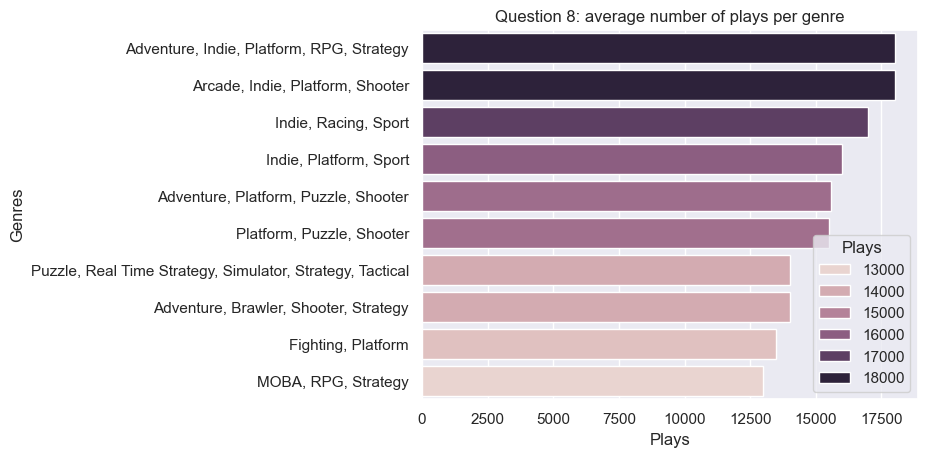

In [55]:
#question 8
sns.barplot(data=avg_play,x='Plays',y='Genres',hue='Plays')
plt.title("Question 8: average number of plays per genre")
plt.show()

In [54]:
games

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"Bandai Namco Entertainment, FromSoftware",4.5,3900,3900,"Adventure, RPG","Elden Ring is a fantasy, action and open world...","""The first playthrough of elden ring is one of...",17000,3800,4600,4800
1,Hades,2019-12-10,Supergiant Games,4.3,2900,2900,"Adventure, Brawler, Indie, RPG",A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21000,3200,6300,3600
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"Nintendo, Nintendo EPD Production Group No. 3",4.4,4300,4300,"Adventure, RPG",The Legend of Zelda: Breath of the Wild is the...,This game is the game (that is not CS:GO) that...,30000,2500,5000,2600
3,Undertale,2015-09-15,"tobyfox, 8-4",4.2,3500,3500,"Adventure, Indie, RPG, Turn Based Strategy","A small child falls into the Underground, wher...",soundtrack is tied for #1 with nier automata. ...,28000,976,4900,1800
4,Hollow Knight,2017-02-24,Team Cherry,4.4,3000,3000,"Adventure, Indie, Platform",A 2D metroidvania with an emphasis on close co...,"""this games worldbuilding is incredible, with ...",21000,2400,8300,2300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,2010-12-22,Telltale Games,3.2,49,49,"Adventure, Point-and-Click",Back to the Future: The Game is one of Telltal...,Very enjoyable game. The story adds onto the m...,367,5,322,76
1508,Team Sonic Racing,2019-05-21,"Sumo Digital, Sega",2.9,462,462,"Arcade, Racing",Team Sonic Racing combines the best elements o...,"jogo morto mas bom, not my cup of tea, ""Compar...",1500,94,314,701
1509,Dragon's Dogma,2012-05-22,Capcom,3.7,12,12,"Brawler, RPG","Set in a huge open world, Dragon’s Dogma: Dark...","Underrated., A grandes rasgos, es como un MMO ...",1100,54,784,602
1510,Baldur's Gate 3,2020-10-06,Larian Studios,4.1,561,561,"Adventure, RPG, Strategy, Tactical, Turn Based...","An ancient evil has returned to Baldur's Gate,...",Bu türe bu oyunla girmeye çalışmak hataydı san...,962,97,883,206


In [50]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1130 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              1130 non-null   object        
 1   Release Date       1130 non-null   datetime64[ns]
 2   Team               1130 non-null   object        
 3   Rating             1130 non-null   float64       
 4   Times Listed       1130 non-null   int32         
 5   Number of Reviews  1130 non-null   int32         
 6   Genres             1130 non-null   object        
 7   Summary            1130 non-null   object        
 8   Reviews            1130 non-null   object        
 9   Plays              1130 non-null   int32         
 10  Playing            1130 non-null   int32         
 11  Backlogs           1130 non-null   int32         
 12  Wishlist           1130 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(6), object(5)
memory usage: 

In [60]:
top=20
top_games=games.sort_values("Rating",ascending=False).head(top)


C:\Users\Dell\AppData\Local\Temp\ipykernel_7008\656962453.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_games,x="Rating",y="Team",palette="mako")


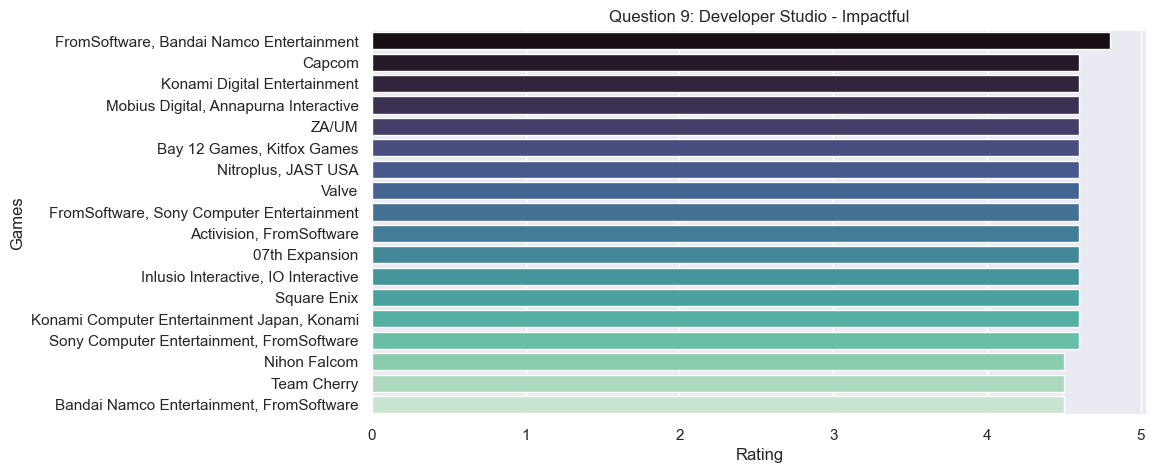

In [83]:
# Question 9 - Impactful

plt.figure(figsize=(10,5))
sns.barplot(data=top_games,x="Rating",y="Team",palette="mako")

plt.xlabel("Rating")
plt.ylabel("Games")
plt.title("Question 9: Developer Studio - Impactful")
sns.set_theme(style="darkgrid")


plt.show()

In [74]:
productivity = games.groupby("Team")["Title"].count().reset_index().sort_values("Title",ascending=False).head(10)
# productivity.columns = ["Developer", "Total_Games"]

In [75]:
productivity

,Team,Title
123,Capcom,27
606,Square Enix,22
419,Nintendo,13
441,"Nintendo, Game Freak",12
298,"Intelligent Systems Co., Ltd., Nintendo",11
454,"Nintendo, Nintendo EAD",11
424,"Nintendo EAD, Nintendo",10
321,Konami,9
701,"Ubisoft Montreal, Ubisoft Entertainment",8
274,"HAL Laboratory, Nintendo",7


C:\Users\Dell\AppData\Local\Temp\ipykernel_7008\310844238.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=productivity,x="Title",y="Team",palette="mako")


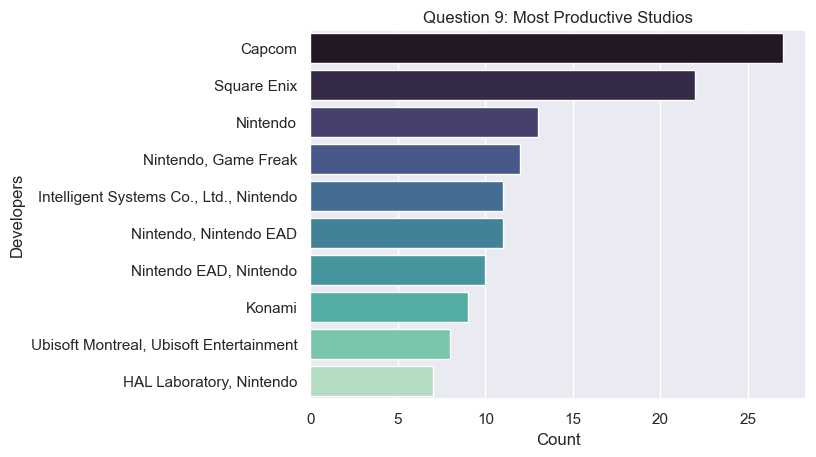

In [84]:
sns.barplot(data=productivity,x="Title",y="Team",palette="mako")
plt.xlabel("Count")
plt.ylabel("Developers")
plt.title("Question 9: Most Productive Studios")
plt.show()
